### Homework 5 Sample Solution
### Karen Mazidi

### Step 1: Description

This notebook performs regression to estimate the price of a car given various features. 

### Step 2: Load the data 

* upload the data
* put the data in a pandas dataframe
* output the data shape (rows, cols)
* output the first few rows of the data

In [63]:
# load the csv file up into the cloud
import numpy as np
import pandas as pd
import io
import seaborn as sb

from google.colab import files
uploaded = files.upload()

Saving audi.csv to audi (3).csv


In [64]:
# put the data in a pandas datafram
df = pd.read_csv(io.BytesIO(uploaded['audi.csv']))

# output the data shape
df.shape

# output the first few rows of the data
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


### Step 3 Data Exploration



In [65]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [66]:
# change categorical column type from object to category
df = df.astype({"model":'category', "transmission":"category", "fuelType":"category"})
df.dtypes

model           category
year               int64
price              int64
transmission    category
mileage            int64
fuelType        category
tax                int64
mpg              float64
engineSize       float64
dtype: object

In [67]:
# check for NAs
df.isna().sum() # check if na over entier DF in one line of code


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [68]:
# use describe() to examine the data
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


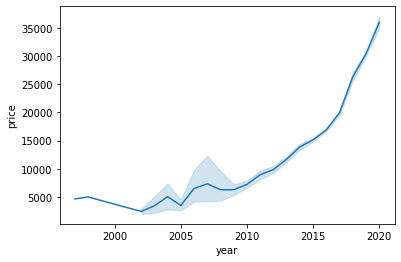

In [69]:
# using seaborn, craete a lineplot() with year on the x axis and price on the y axis
sb.lineplot(x=df['year'], y=df['price'])

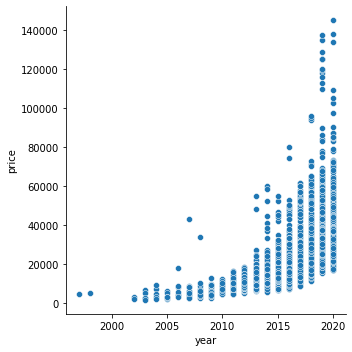

In [70]:
# create another plot exploring the data
# choose columns and plot type

sb.relplot(x='year', y='price', data=df)

### Step 4 Prepare Data

You can use the code below for this step. 



In [71]:
# set up X and y

X=df.drop(columns=['price'],axis=1)
y=df['price']

In [72]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

# scale the numeric data
col_list = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = MinMaxScaler()
train_numeric = scaler.fit_transform(X_train[col_list])
test_numeric = scaler.transform(X_test[col_list])

# one-hot encode the categorical data for model, transmission, and fuelType
# model
zipBinarizer = LabelBinarizer().fit(df['model'])
train_model = zipBinarizer.transform(X_train['model'])
test_model = zipBinarizer.transform(X_test['model'])
# transmission
zipBinarizer = LabelBinarizer().fit(df['transmission'])
train_transmission = zipBinarizer.transform(X_train['transmission'])
test_transmission = zipBinarizer.transform(X_test['transmission'])
# fuelType
zipBinarizer = LabelBinarizer().fit(df['fuelType'])
train_fuelType = zipBinarizer.transform(X_train['fuelType'])
test_fuelType = zipBinarizer.transform(X_test['fuelType'])

# concatenate
X_train_input = np.hstack([train_numeric, train_model, train_transmission, train_fuelType])
X_test_input = np.hstack([test_numeric, test_model, test_transmission, test_fuelType])

print(X_train_input[:3])


[[0.82608696 0.11764433 0.28448276 0.19716647 0.31746032 0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         1.         0.
  0.        ]
 [0.7826087  0.14260416 0.21551724 0.18595041 0.22222222 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  1.        ]
 [0.95652174 0.01500005 0.25       0.14521842 0.23809524 0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        

### Step 5 Linear regression

Run linear regression in sklearn. 

In [73]:
# train the algorithm
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_input, y_train)

LinearRegression()

In [74]:
# make predictions
y_pred = linreg.predict(X_test_input)


In [75]:
# evaluation on the test data using mse, mae, and r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('r2: ', r2_score(y_test, y_pred))

MSE:  11345928.380506093
MAE:  2376.294283036551
r2:  0.8919432925801362


In [76]:
# display the first 5 predictions
print(y_pred[:5])

[18446. 24198. 13558. 28990. 21068.]


In [77]:
# display the first 5 actual values
print(y_test[:5])

6353    20445
2309    21965
5279    16490
761     31500
6814    18100
Name: price, dtype: int64


### Regression in Keras

In [78]:
# build a sequential model
# choose the architecture

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
                          layers.Dense(500, activation='relu'),
                          layers.Dense(250, activation='relu'),
                          layers.Dense(50, activation='relu'),
                          layers.Dense(1)                        
])



In [79]:
# compile the model
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mse","mae"])


In [89]:
# train the model
model.fit(X_train_input, y_train, epochs=200, batch_size=128)


Epoch 1/200
67/67 [==============================] - 0s 6ms/step - loss: 6246574.0000 - mse: 6246574.0000 - mae: 1708.0011
Epoch 2/200
67/67 [==============================] - 0s 6ms/step - loss: 6293600.5000 - mse: 6293600.5000 - mae: 1709.2031
Epoch 3/200
67/67 [==============================] - 0s 6ms/step - loss: 6286015.5000 - mse: 6286015.5000 - mae: 1704.2633
Epoch 4/200
67/67 [==============================] - 0s 6ms/step - loss: 6231088.0000 - mse: 6231088.0000 - mae: 1700.6010
Epoch 5/200
67/67 [==============================] - 0s 6ms/step - loss: 6292225.0000 - mse: 6292225.0000 - mae: 1709.0103
Epoch 6/200
67/67 [==============================] - 0s 6ms/step - loss: 6267861.0000 - mse: 6267861.0000 - mae: 1702.5846
Epoch 7/200
67/67 [==============================] - 0s 5ms/step - loss: 6287717.5000 - mse: 6287717.5000 - mae: 1710.9348
Epoch 8/200
67/67 [==============================] - 0s 5ms/step - loss: 6243523.0000 - mse: 6243523.0000 - mae: 1701.1642
Epoch 9/200
67/6

In [88]:
# output test mse score, test mae score


model.evaluate(X_test_input, y_test)



67/67 [==============================] - 0s 2ms/step - loss: 5767478.5000 - mse: 5767478.5000 - mae: 1724.6068


[5767478.5, 5767478.5, 1724.6068115234375]

### Step 7 Commentary

Answer the following questions:

a. Compare metrics from sklearn and Keras. 


b. Explore the data a bit more to speculate on why you achieved the results you got. 


c. Describe all the architectures/hyperparameters you tried and the results. What do you conclude?



first i tried 

model = keras.Sequential([
                          layers.Dense(5, activation='relu'),
                          
])
and

model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["mse", 'mae']) 

results: mse: 675202112.0000 - mae: 23048.5840


NExt i change arch to 64, 64, 1 and upped the epochs to 100 from 5
9855431.0000 - mae: 2057.0847